# Overfiting in CNN

Testing different CNN architectures on CIFAR 10

### Victor Nascimento Ribeiro - 10/2022

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Download CIFAR10

In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


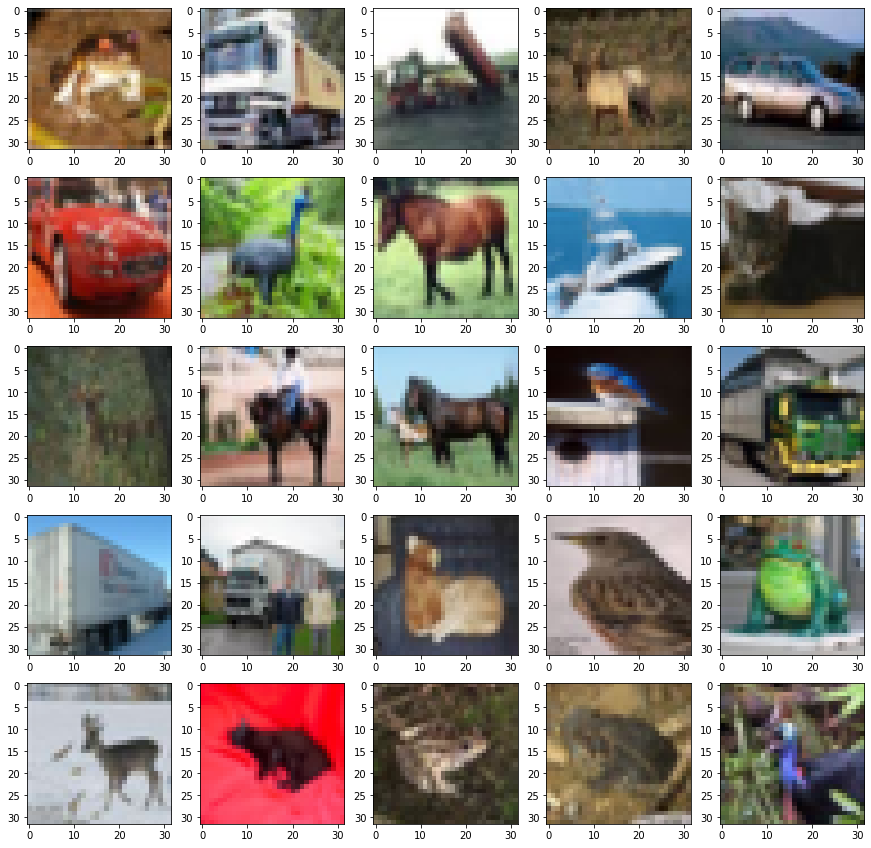

In [ ]:
fig, ax = plt.subplots(5, 5)
fig.set_size_inches(15, 15)
 
k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(train_images[k], aspect='auto')
        k += 1
 
plt.show()

- airplane
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
#train_images = to_categorical(train_images, 10)
#test_images = to_categorical(test_images , 10)

# Without convolution

In [ ]:
model1 = Sequential([
    Dense(units=256, input_shape=(32*32*3,), activation='relu'),
    Dropout(0.1),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', # not one-hot ecoded
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images.reshape(50000, 32*32*3),
                      train_labels,
                      epochs=50,
                      batch_size=64,
                      verbose=1,
                      validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 5s 4ms/step - loss: 2.3944 - accuracy: 0.1820 - val_loss: 2.1916 - val_accuracy: 0.2759
Epoch 2/50
625/625 [==============================] - 2s 3ms/step - loss: 2.1901 - accuracy: 0.2523 - val_loss: 2.0486 - val_accuracy: 0.3176
Epoch 3/50
625/625 [==============================] - 2s 4ms/step - loss: 2.0929 - accuracy: 0.2855 - val_loss: 1.9576 - val_accuracy: 0.3509
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 2.0162 - accuracy: 0.3092 - val_loss: 1.8872 - val_accuracy: 0.3728
Epoch 5/50
625/625 [==============================] - 2s 3ms/step - loss: 1.9558 - accuracy: 0.3321 - val_loss: 1.8519 - val_accuracy: 0.3821
Epoch 6/50
625/625 [==============================] - 2s 4ms/step - loss: 1.9179 - accuracy: 0.3475 - val_loss: 1.8091 - val_accuracy: 0.4031
Epoch 7/50
625/625 [==============================] - 2s 4ms/step - loss: 1.8733 - accuracy: 0.3638 - val_loss: 1.7759 - val_accuracy: 0.4151
Epoch 

In [ ]:
test_loss1, test_acc1 = model1.evaluate(test_images.reshape((10000, 32*32*3)), test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.4209 - accuracy: 0.5169


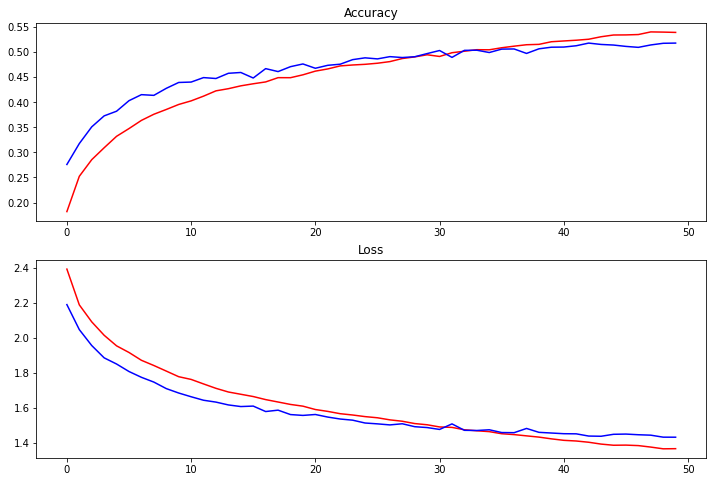

In [ ]:
figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12, 8)

axis[0].plot(history1.history['accuracy'], color='red')
axis[0].plot(history1.history['val_accuracy'], color='blue')
axis[0].set_title("Accuracy")
  
axis[1].plot(history1.history['loss'], color='red')
axis[1].plot(history1.history['val_loss'], color='blue')
axis[1].set_title("Loss")

plt.show()

## Small CNN 

In [ ]:
model2 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)), # strides vem por padrao igual o tamanho do kernel
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(units=10, activation='softmax')
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', # not one-hot ecoded
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_images,
          train_labels,
          epochs=50,
          batch_size=64,
          verbose=1,
          validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 11s 8ms/step - loss: 2.6836 - accuracy: 0.3036 - val_loss: 1.9163 - val_accuracy: 0.4457
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 1.8314 - accuracy: 0.4253 - val_loss: 1.6148 - val_accuracy: 0.4987
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 1.6146 - accuracy: 0.4775 - val_loss: 1.4657 - val_accuracy: 0.5356
Epoch 4/50
625/625 [==============================] - 5s 7ms/step - loss: 1.4945 - accuracy: 0.5109 - val_loss: 1.3637 - val_accuracy: 0.5654
Epoch 5/50
625/625 [==============================] - 4s 7ms/step - loss: 1.4219 - accuracy: 0.5331 - val_loss: 1.3157 - val_accuracy: 0.5760
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 1.3602 - accuracy: 0.5561 - val_loss: 1.2851 - val_accuracy: 0.5862
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 1.3146 - accuracy: 0.5706 - val_loss: 1.2391 - val_accuracy: 0.6111
Epoch

In [ ]:
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.0074 - accuracy: 0.7283


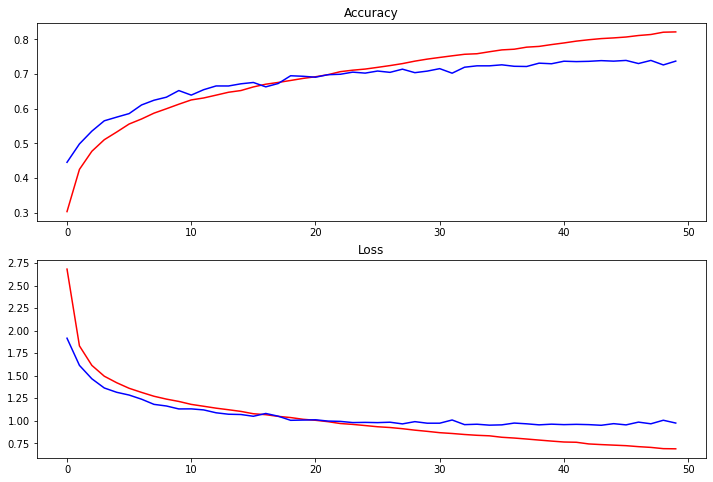

In [ ]:
figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12, 8)

axis[0].plot(history2.history['accuracy'], color='red')
axis[0].plot(history2.history['val_accuracy'], color='blue')
axis[0].set_title("Accuracy")
  
axis[1].plot(history2.history['loss'], color='red')
axis[1].plot(history2.history['val_loss'], color='blue')
axis[1].set_title("Loss")

plt.show()

# Larger CNN

In [ ]:
model3 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)),

        Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)),
        
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(units=10, activation='softmax')
])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', # not one-hot ecoded
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_images,
          train_labels,
          epochs=50,
          batch_size=64,
          verbose=1,
          validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 7s 9ms/step - loss: 1.7293 - accuracy: 0.3714 - val_loss: 1.5499 - val_accuracy: 0.4424
Epoch 2/50
625/625 [==============================] - 5s 9ms/step - loss: 1.3942 - accuracy: 0.4986 - val_loss: 1.2880 - val_accuracy: 0.5454
Epoch 3/50
625/625 [==============================] - 5s 9ms/step - loss: 1.2186 - accuracy: 0.5699 - val_loss: 1.1639 - val_accuracy: 0.5852
Epoch 4/50
625/625 [==============================] - 5s 9ms/step - loss: 1.0915 - accuracy: 0.6178 - val_loss: 1.0532 - val_accuracy: 0.6288
Epoch 5/50
625/625 [==============================] - 5s 9ms/step - loss: 0.9939 - accuracy: 0.6530 - val_loss: 1.0570 - val_accuracy: 0.6316
Epoch 6/50
625/625 [==============================] - 6s 9ms/step - loss: 0.9171 - accuracy: 0.6792 - val_loss: 0.9552 - val_accuracy: 0.6690
Epoch 7/50
625/625 [==============================] - 5s 9ms/step - loss: 0.8454 - accuracy: 0.7074 - val_loss: 0.8981 - val_accuracy: 0.6864
Epoch 

In [ ]:
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 2.0718 - accuracy: 0.7152


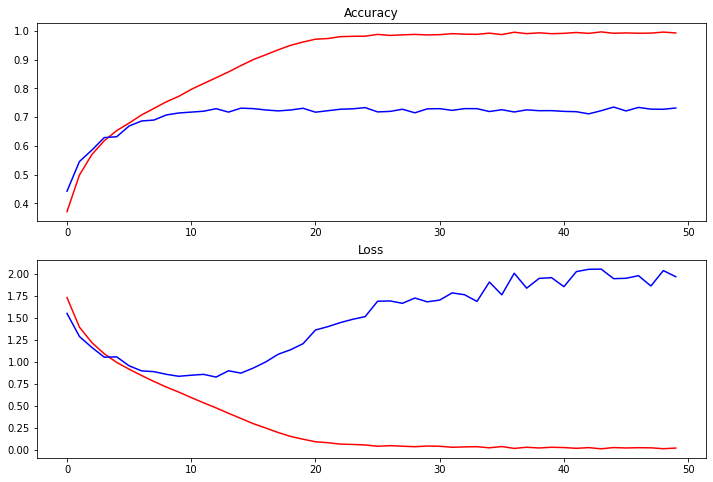

In [ ]:
figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12, 8)

axis[0].plot(history3.history['accuracy'], color='red')
axis[0].plot(history3.history['val_accuracy'], color='blue')
axis[0].set_title("Accuracy")
  
axis[1].plot(history3.history['loss'], color='red')
axis[1].plot(history3.history['val_loss'], color='blue')
axis[1].set_title("Loss")

plt.show()

# Larger CNN + BatchNorm + Regularization

In [ ]:
model4 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),

        Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        
        Flatten(),
        Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dense(units=10, activation='softmax')
])

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
model4.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', # not one-hot ecoded
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(train_images,
          train_labels,
          epochs=50,
          batch_size=64,
          verbose=1,
          validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 8s 12ms/step - loss: 2.8466 - accuracy: 0.4886 - val_loss: 2.6964 - val_accuracy: 0.5176
Epoch 2/50
625/625 [==============================] - 6s 10ms/step - loss: 2.2431 - accuracy: 0.6588 - val_loss: 2.3446 - val_accuracy: 0.6158
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 1.9317 - accuracy: 0.7434 - val_loss: 2.2202 - val_accuracy: 0.6363
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 1.6646 - accuracy: 0.8103 - val_loss: 2.1017 - val_accuracy: 0.6576
Epoch 5/50
625/625 [==============================] - 6s 10ms/step - loss: 1.4222 - accuracy: 0.8698 - val_loss: 2.0584 - val_accuracy: 0.6525
Epoch 6/50
625/625 [==============================] - 7s 10ms/step - loss: 1.2148 - accuracy: 0.9171 - val_loss: 2.0114 - val_accuracy: 0.6577
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 1.0386 - accuracy: 0.9524 - val_loss: 1.9841 - val_accuracy: 0.6598

In [ ]:
test_loss4, test_acc4 = model4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.8573 - accuracy: 0.6785


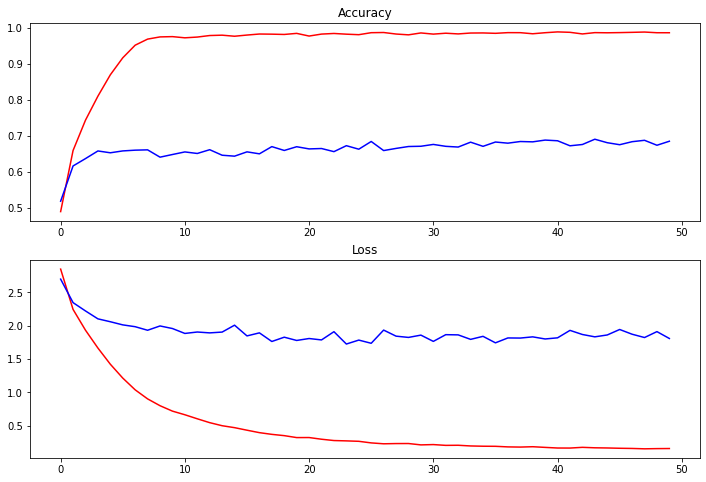

In [ ]:
figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12, 8)

axis[0].plot(history4.history['accuracy'], color='red')
axis[0].plot(history4.history['val_accuracy'], color='blue')
axis[0].set_title("Accuracy")
  
axis[1].plot(history4.history['loss'], color='red')
axis[1].plot(history4.history['val_loss'], color='blue')
axis[1].set_title("Loss")

plt.show()

# Larger CNN + BatchNorm + Reguralizer + Dropout

In [ ]:
model5 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.2), 

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),

        Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.4),
        
        Flatten(),
        Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(units=10, activation='softmax')
])

In [ ]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
model5.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(train_images,
          train_labels,
          epochs=50,
          batch_size=64,
          verbose=1,
          validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 8s 11ms/step - loss: 3.7852 - accuracy: 0.3021 - val_loss: 3.1940 - val_accuracy: 0.3516
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 3.1774 - accuracy: 0.4080 - val_loss: 2.7251 - val_accuracy: 0.4941
Epoch 3/50
625/625 [==============================] - 7s 10ms/step - loss: 2.8909 - accuracy: 0.4622 - val_loss: 2.6168 - val_accuracy: 0.5219
Epoch 4/50
625/625 [==============================] - 7s 11ms/step - loss: 2.6579 - accuracy: 0.5071 - val_loss: 2.5373 - val_accuracy: 0.5279
Epoch 5/50
625/625 [==============================] - 7s 11ms/step - loss: 2.4630 - accuracy: 0.5464 - val_loss: 2.3344 - val_accuracy: 0.5797
Epoch 6/50
625/625 [==============================] - 7s 11ms/step - loss: 2.2909 - accuracy: 0.5781 - val_loss: 2.1975 - val_accuracy: 0.5972
Epoch 7/50
625/625 [==============================] - 7s 10ms/step - loss: 2.1272 - accuracy: 0.6042 - val_loss: 2.0429 - val_accuracy: 0.6253

In [ ]:
test_loss5, test_acc5 = model5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.6952 - accuracy: 0.8416


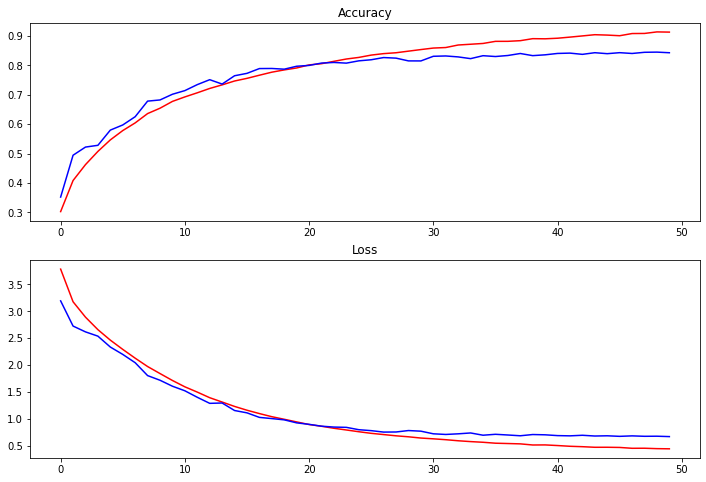

In [ ]:
figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12, 8)

axis[0].plot(history5.history['accuracy'], color='red')
axis[0].plot(history5.history['val_accuracy'], color='blue')
axis[0].set_title("Accuracy")
  
axis[1].plot(history5.history['loss'], color='red')
axis[1].plot(history5.history['val_loss'], color='blue')
axis[1].set_title("Loss")

plt.show()

# Larger CNN + BatchNorm + Reguralizer + Dropout + Data Augmentation

In [ ]:
batch_size = 64
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(train_images, train_labels, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size

In [ ]:
history6 = model5.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=50)

Epoch 1/50
781/781 [==============================] - 27s 33ms/step - loss: 0.8987 - accuracy: 0.7752
Epoch 2/50
781/781 [==============================] - 25s 33ms/step - loss: 0.8461 - accuracy: 0.7867
Epoch 3/50
781/781 [==============================] - 26s 33ms/step - loss: 0.8204 - accuracy: 0.7922
Epoch 4/50
781/781 [==============================] - 26s 33ms/step - loss: 0.7909 - accuracy: 0.7993
Epoch 5/50
781/781 [==============================] - 26s 34ms/step - loss: 0.7755 - accuracy: 0.8049
Epoch 6/50
781/781 [==============================] - 26s 33ms/step - loss: 0.7576 - accuracy: 0.8096
Epoch 7/50
781/781 [==============================] - 26s 33ms/step - loss: 0.7583 - accuracy: 0.8082
Epoch 8/50
781/781 [==============================] - 26s 33ms/step - loss: 0.7384 - accuracy: 0.8130
Epoch 9/50
781/781 [==============================] - 26s 33ms/step - loss: 0.7289 - accuracy: 0.8171
Epoch 10/50
781/781 [==============================] - 26s 33ms/step - loss: 0.720

In [ ]:
test_loss6, test_acc6 = model5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5421 - accuracy: 0.8718


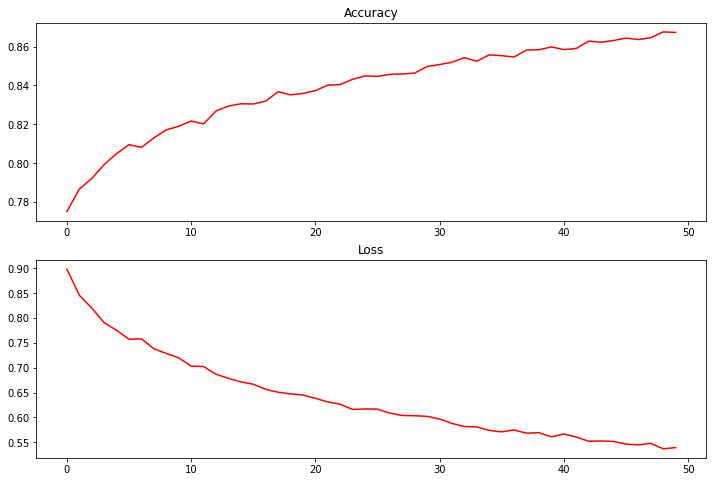

In [ ]:
figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12, 8)

axis[0].plot(history6.history['accuracy'], color='red')
axis[0].set_title("Accuracy")
  
axis[1].plot(history6.history['loss'], color='red')
axis[1].set_title("Loss")

plt.show()

## Resultados

- Without: **0.5169**
- Small CNN : **0.7283**
- Larger CNN: **0.7152**
- Larger CNN: + BatchNorm + Regularization: **0.6785**
- Larger CNN: + BatchNorm + Reguralizer + Dropout: **0.8416**
- Larger CNN: + BatchNorm + Reguralizer + Dropout + Data Augmentation: **0.8718**